# Deep Learning Models - Introduction
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org
* SHAP: https://github.com/slundberg/shap
* LIME: https://github.com/marcotcr/lime
* TensorFlow: https://www.tensorflow.org/
* Keras: https://keras.io/

### If you use Google Colab, switch to Hardware Accelerator to GPU or TPU to get a runtime perormance boost.
* Runtime > Change Runtime Type >
* 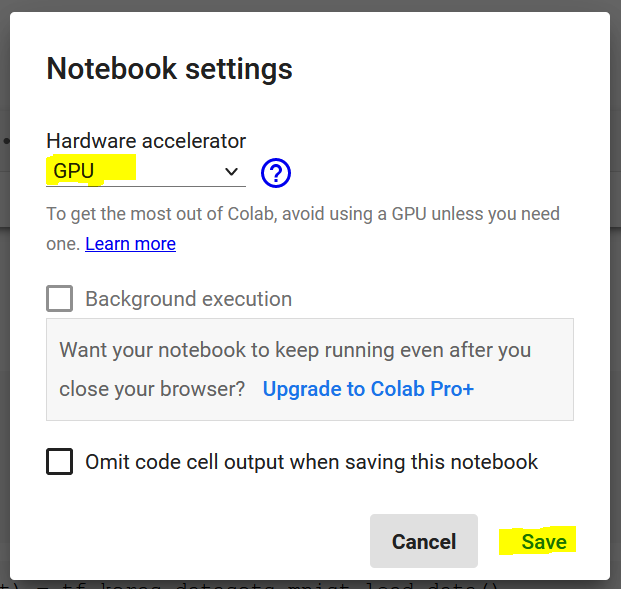

# Download Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Dataset Size (images, x_pixels, y_pixels)

In [3]:
print("Test Dataset:", X_test.shape)
print("Train Dataset:", X_train.shape)

Test Dataset: (10000, 28, 28)
Train Dataset: (60000, 28, 28)


## Single Image (x_pixels, y_pixels)

In [4]:
X_test[0].shape 

(28, 28)

## Array Represntation of Image (Pixel Color Value in the range [0, 255])

In [5]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Visualize Image

Number =  7


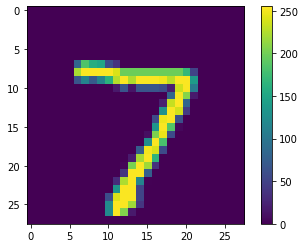

In [6]:
pyplot.imshow(X_test[0])
pyplot.colorbar()
print("Number = ", y_test[0])

## Normalize Image Data

Number =  7


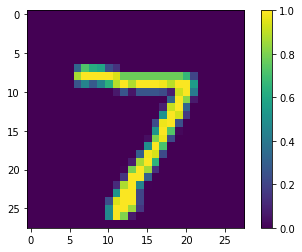

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

pyplot.imshow(X_test[0])
pyplot.colorbar()
print("Number = ", y_test[0])

# Image Labels (y variable/target variable)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
len(np.unique(y_train))

10

In [11]:
print("y_test:", y_test.shape)
print("y_train:", y_train.shape)

y_test: (10000,)
y_train: (60000,)


# Create Model

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


# Compile Model

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


# Fit Model

In [14]:
# Fit model
hist = model.fit(X_train, y_train,
                batch_size=128,
                epochs=10,
                verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.3563 - sparse_categorical_accuracy: 0.9013 - val_loss: 0.2017 - val_sparse_categorical_accuracy: 0.9400
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1669 - sparse_categorical_accuracy: 0.9533 - val_loss: 0.1376 - val_sparse_categorical_accuracy: 0.9594
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1223 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.1134 - val_sparse_categorical_accuracy: 0.9650
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9674
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9780 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 0.9714
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0625 - sparse_categorica

# Model Fitting History

In [15]:
fit_history = pd.DataFrame(hist.history)
fit_history.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.356273,0.901267,0.201742,0.9400
1,0.166938,0.953317,0.137601,0.9594
2,0.122292,0.964833,0.113394,0.9650
3,0.095314,0.972167,0.104817,0.9674
4,0.075781,0.978017,0.095806,0.9714


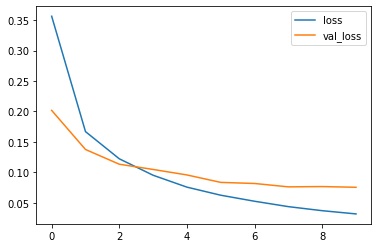

In [16]:
fit_history[['loss', 'val_loss' ]].plot()

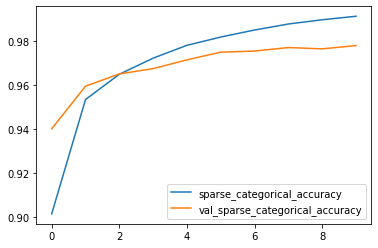

In [17]:
fit_history[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy' ]].plot()

# Evaluate Model

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)    
print(model.summary())
print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
train samples: 60000
test samples: 10000
Test loss: 0.07555747777223587
Test accuracy: 0.9779000282287598


In [19]:
test_predictions = model.predict(X_test)   
test_predictions

array([[ -2.99845   ,  -8.390385  ,  -0.35215625, ...,  11.148284  ,
         -1.2337794 ,  -0.04166415],
       [ -3.819152  ,   2.9095573 ,  13.492603  , ..., -15.164815  ,
         -1.0707755 , -12.013202  ],
       [ -6.566907  ,   4.7005606 ,  -3.9538538 , ...,  -1.6514975 ,
         -1.572541  ,  -5.476069  ],
       ...,
       [-10.720506  ,  -6.1155286 , -11.837162  , ...,   1.3122442 ,
         -0.66296244,   2.3382597 ],
       [ -9.5680895 ,  -8.999507  ,  -7.7543955 , ...,  -6.4868493 ,
          2.713192  , -11.684647  ],
       [ -1.9348254 ,  -8.413104  ,  -1.9017535 , ..., -15.007633  ,
         -8.443702  ,  -9.100571  ]], dtype=float32)

In [20]:
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions

array([7, 2, 1, ..., 4, 5, 6])

## Confusion Matrix

In [21]:
test_result = pd.DataFrame({'y_act': y_test, 'y_pred':test_predictions})
test_result.sample(5)

,y_act,y_pred
5117,6,6
8135,8,8
5318,1,1
3999,9,9
6273,4,4


In [22]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,4,5,6,7,8,9,All
y_act,,,,,,,,,,,
0,969,0,1,2,1,1,2,1,3,0,980
1,0,1122,3,3,0,1,2,1,3,0,1135
2,4,2,1007,0,1,0,2,7,9,0,1032
3,0,0,4,991,1,2,0,3,1,8,1010
4,1,0,3,0,962,1,3,1,1,10,982
5,3,0,0,13,1,860,3,1,5,6,892
6,5,3,2,1,5,3,934,1,4,0,958
7,0,4,6,2,4,0,0,1005,3,4,1028
8,2,0,2,7,5,3,1,3,946,5,974


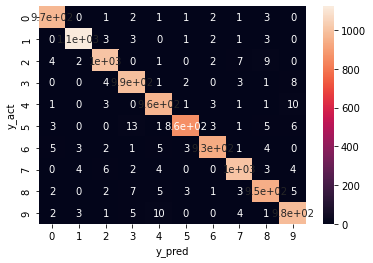

In [23]:

sns.heatmap(pd.crosstab(test_result.y_act, test_result.y_pred, margins=False), annot=True)

# Convolution Neural Network (CNN) Model

## Load Dataset and Normalize

Number =  7


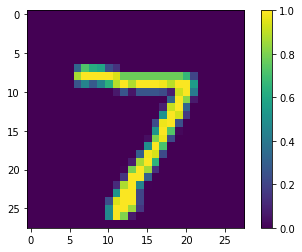

In [24]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

pyplot.imshow(X_test[0])
pyplot.colorbar()
print("Number = ", y_test[0])

## Transform image data into single channel (monochrome)

In [25]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [26]:
print("Test Dataset:", X_test.shape)
print("Train Dataset:", X_train.shape)

Test Dataset: (10000, 28, 28, 1)
Train Dataset: (60000, 28, 28, 1)


### One-hot encode y variable

In [27]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [28]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
print("y_test:", y_test.shape)
print("y_train:", y_train.shape)

y_test: (10000, 10)
y_train: (60000, 10)


## CNN Model

In [30]:
input_shape = (28, 28, 1)
num_classes = 10

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [31]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.1, 
          validation_data=(X_test, y_test))


Epoch 1/10
422/422 [==============================] - 5s 8ms/step - loss: 0.4181 - accuracy: 0.8834 - val_loss: 0.1534 - val_accuracy: 0.9598
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.1764 - accuracy: 0.9487 - val_loss: 0.1059 - val_accuracy: 0.9715
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 0.1327 - accuracy: 0.9606 - val_loss: 0.0815 - val_accuracy: 0.9797
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1162 - accuracy: 0.9652 - val_loss: 0.0743 - val_accuracy: 0.9808
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1019 - accuracy: 0.9697 - val_loss: 0.0692 - val_accuracy: 0.9818
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0948 - accuracy: 0.9714 - val_loss: 0.0617 - val_accuracy: 0.9835
Epoch 7/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0612 - val_accuracy: 0.9843
Epoch 

## Evaluate Model

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)    
print(model.summary())
print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

## Confusion Matrix

In [33]:
test_predictions = model.predict(X_test)   
test_predictions

array([[5.8599952e-08, 5.5936491e-09, 1.3047303e-06, ..., 9.9993765e-01,
        4.8649474e-07, 2.7653034e-06],
       [4.8560760e-06, 5.8834365e-05, 9.9928039e-01, ..., 5.1427660e-12,
        5.4629841e-06, 1.9569787e-10],
       [2.8335344e-05, 9.9824834e-01, 2.3056219e-04, ..., 4.0989966e-04,
        2.1893988e-04, 3.1942934e-06],
       ...,
       [4.9618837e-10, 4.4438031e-09, 6.2751755e-09, ..., 2.9541368e-05,
        3.8905160e-05, 7.7008866e-05],
       [5.0368197e-08, 1.1792892e-09, 7.9356255e-09, ..., 6.4100867e-09,
        2.2055469e-03, 6.0475621e-08],
       [3.2834404e-08, 9.7465319e-13, 1.8838281e-06, ..., 6.0690349e-11,
        9.5558903e-08, 6.3147466e-11]], dtype=float32)

In [34]:
# Decide the class based on the class with maxiumum predicted value.
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
# Convert One hot encoded y column to categorical column
y_test = np.argmax(y_test, axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
test_result = pd.DataFrame({'y_act': y_test, 'y_pred':test_predictions})
test_result.sample(5)

,y_act,y_pred
8689,8,8
7690,3,3
5025,1,1
4027,7,7
5224,3,3


In [37]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,4,5,6,7,8,9,All
y_act,,,,,,,,,,,
0,972,0,1,0,0,0,2,2,3,0,980
1,0,1125,1,1,0,0,4,1,3,0,1135
2,3,2,1010,0,4,0,2,6,5,0,1032
3,0,0,2,997,0,3,0,4,3,1,1010
4,0,0,0,0,970,0,3,0,2,7,982
5,2,0,0,7,0,873,7,0,3,0,892
6,5,2,0,0,1,2,945,0,3,0,958
7,0,3,11,3,1,1,0,1003,3,3,1028
8,6,0,2,1,2,1,1,3,955,3,974


<hr>
Last update 2022-04-07 by Sumudu Tennakoon